# 4. Increase Accuracy by linear model assumption

In [148]:
import pandas as pd
import numpy as np

#for plotting and visualization
import matplotlib.pyplot as plt
import seaborn as sns

#for the Q-Q plots
import scipy.stats as stats

#the dataset for the demo
from sklearn.datasets import load_boston

#for linear regression
from sklearn.linear_model import LinearRegression

#to split and standarize the dataset
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

#to evaluate the regression model
from sklearn.metrics import mean_squared_error

In [7]:
data=load_boston()

In [8]:
data.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [9]:
print(data.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [12]:
boston=pd.DataFrame(data.data,columns=data.feature_names)
boston

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [15]:
boston['MEDV']=data.target
boston

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [16]:
features=data.feature_names
features

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

### create reference data

In [19]:
np.random.seed(0)
n=boston.shape[0]
x=np.random.randn(n)
y=x*10+np.random.randn(n)*2
demo_df=pd.DataFrame([x,y]).T
demo_df.columns=['x','y']
demo_df

,x,y
0,1.764052,14.375254
1,0.400157,0.866037
2,0.978738,7.429064
3,2.240893,25.011788
4,1.867558,20.466100
...,...,...
501,-0.034242,-3.978578
502,1.096347,10.864820
503,-0.234216,-1.864091
504,-0.347451,-5.475167


### check linear assumption for boston dataset

C:\ProgramData\Anaconda3\envs\tens_2\lib\site-packages\seaborn\regression.py:580: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


Text(0.5, 6.79999999999999, 'independent variable')

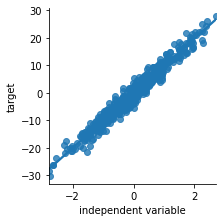

In [37]:
sns.lmplot(x='x',y='y',data=demo_df,order=1,size=3)
plt.ylabel('target')
plt.xlabel('independent variable')

C:\ProgramData\Anaconda3\envs\tens_2\lib\site-packages\seaborn\regression.py:580: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


Text(0.5, 6.79999999999999, 'LSTAT')

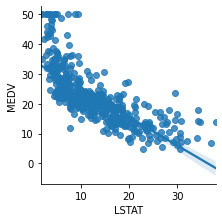

In [38]:
sns.lmplot(x='LSTAT',y='MEDV',data=boston,order=1,size=3)
plt.ylabel('MEDV')
plt.xlabel('LSTAT')

C:\ProgramData\Anaconda3\envs\tens_2\lib\site-packages\seaborn\regression.py:580: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


Text(0.5, 6.79999999999999, 'LSTAT')

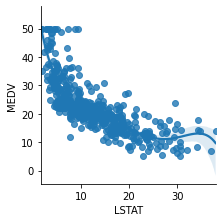

In [39]:
sns.lmplot(x='LSTAT',y='MEDV',data=boston,order=5,size=3)
plt.ylabel('MEDV')
plt.xlabel('LSTAT')

C:\ProgramData\Anaconda3\envs\tens_2\lib\site-packages\seaborn\regression.py:580: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


Text(0.5, 6.79999999999999, 'RM')

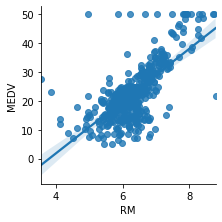

In [40]:
sns.lmplot(x='RM',y='MEDV',data=boston,order=1,size=3)
plt.ylabel('MEDV')
plt.xlabel('RM')

C:\ProgramData\Anaconda3\envs\tens_2\lib\site-packages\seaborn\regression.py:580: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


Text(0.5, 6.79999999999999, 'CRIM')

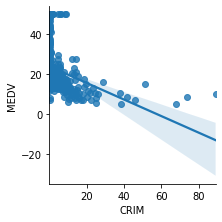

In [41]:
sns.lmplot(x='CRIM',y='MEDV',data=boston,order=1,size=3)
plt.ylabel('MEDV')
plt.xlabel('CRIM')

### LOG transformation

In [32]:
boston['log_crim']=np.log(boston['CRIM'])

C:\ProgramData\Anaconda3\envs\tens_2\lib\site-packages\seaborn\regression.py:580: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


Text(0.5, 6.79999999999999, 'log_crim')

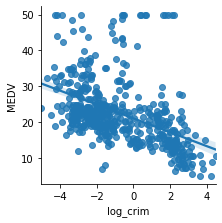

In [42]:
sns.lmplot(x='log_crim',y='MEDV',data=boston,order=1,size=3)
plt.ylabel('MEDV')
plt.xlabel('log_crim')

In [44]:
boston.drop(['log_crim'],axis=1,inplace=True)

### assessing linear relationship by examining the residuals

In [47]:
demo_df.head()

,x,y
0,1.764052,14.375254
1,0.400157,0.866037
2,0.978738,7.429064
3,2.240893,25.011788
4,1.867558,20.466100


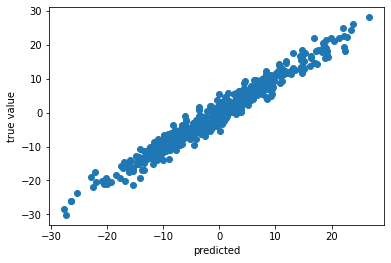

In [54]:
reg=LinearRegression()
reg.fit(demo_df[['x']],demo_df['y'])
pred=reg.predict(demo_df[['x']])
error=demo_df['y']-pred
plt.scatter(x=pred,y=demo_df['y'])
plt.xlabel('predicted')
plt.ylabel('true value')
plt.show()

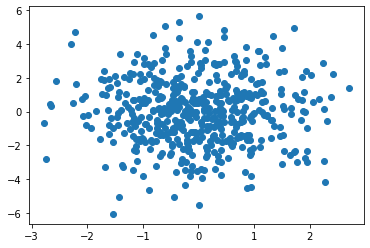

In [55]:
plt.scatter(y=error,x=demo_df['x'])

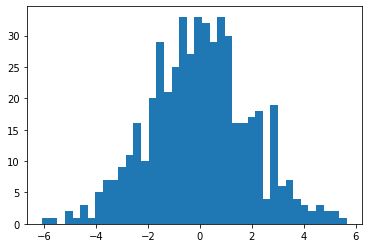

In [58]:
plt.hist(error,bins=40)
plt.show()

C:\ProgramData\Anaconda3\envs\tens_2\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


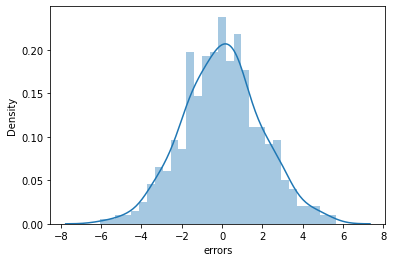

In [60]:
sns.distplot(error,bins=30)
plt.xlabel('errors')
plt.show()

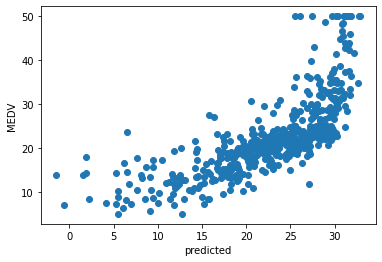

In [63]:
reg=LinearRegression()
reg.fit(boston[['LSTAT']],boston['MEDV'])
pred=reg.predict(boston[['LSTAT']])
error=boston['MEDV']-pred
plt.scatter(x=pred,y=boston['MEDV'])
plt.xlabel('predicted')
plt.ylabel('MEDV')
plt.show()

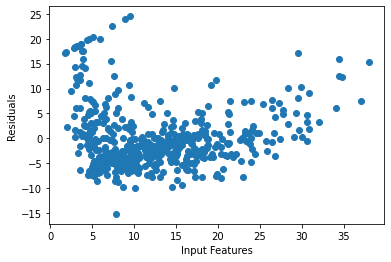

In [65]:
plt.scatter(y=error,x=boston['LSTAT'])
plt.ylabel('Residuals')
plt.xlabel('Input Features')
plt.show()

C:\ProgramData\Anaconda3\envs\tens_2\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='MEDV', ylabel='Density'>

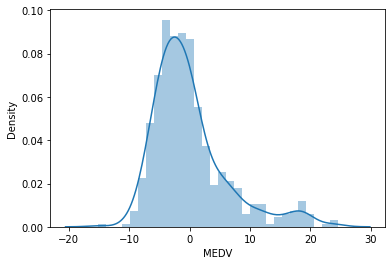

In [68]:
sns.distplot(error,bins=30)

### log transformer for LSTAT

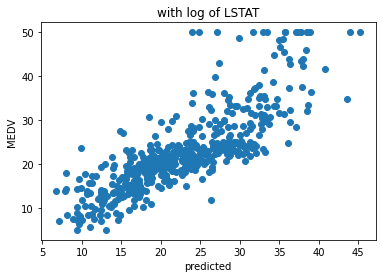

In [70]:
reg=LinearRegression()
reg.fit(np.log(boston[['LSTAT']]),boston['MEDV'])
pred=reg.predict(np.log(boston[['LSTAT']]))
error=boston['MEDV']-pred
plt.scatter(x=pred,y=boston['MEDV'])
plt.xlabel('predicted')
plt.ylabel('MEDV')
plt.title('with log of LSTAT')
plt.show()

C:\ProgramData\Anaconda3\envs\tens_2\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='MEDV', ylabel='Density'>

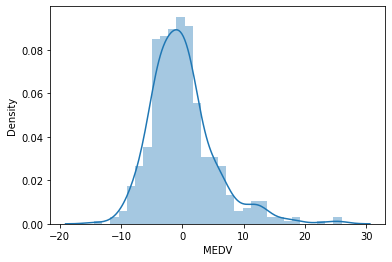

In [71]:
sns.distplot(error,bins=30)

### Multicolinearity

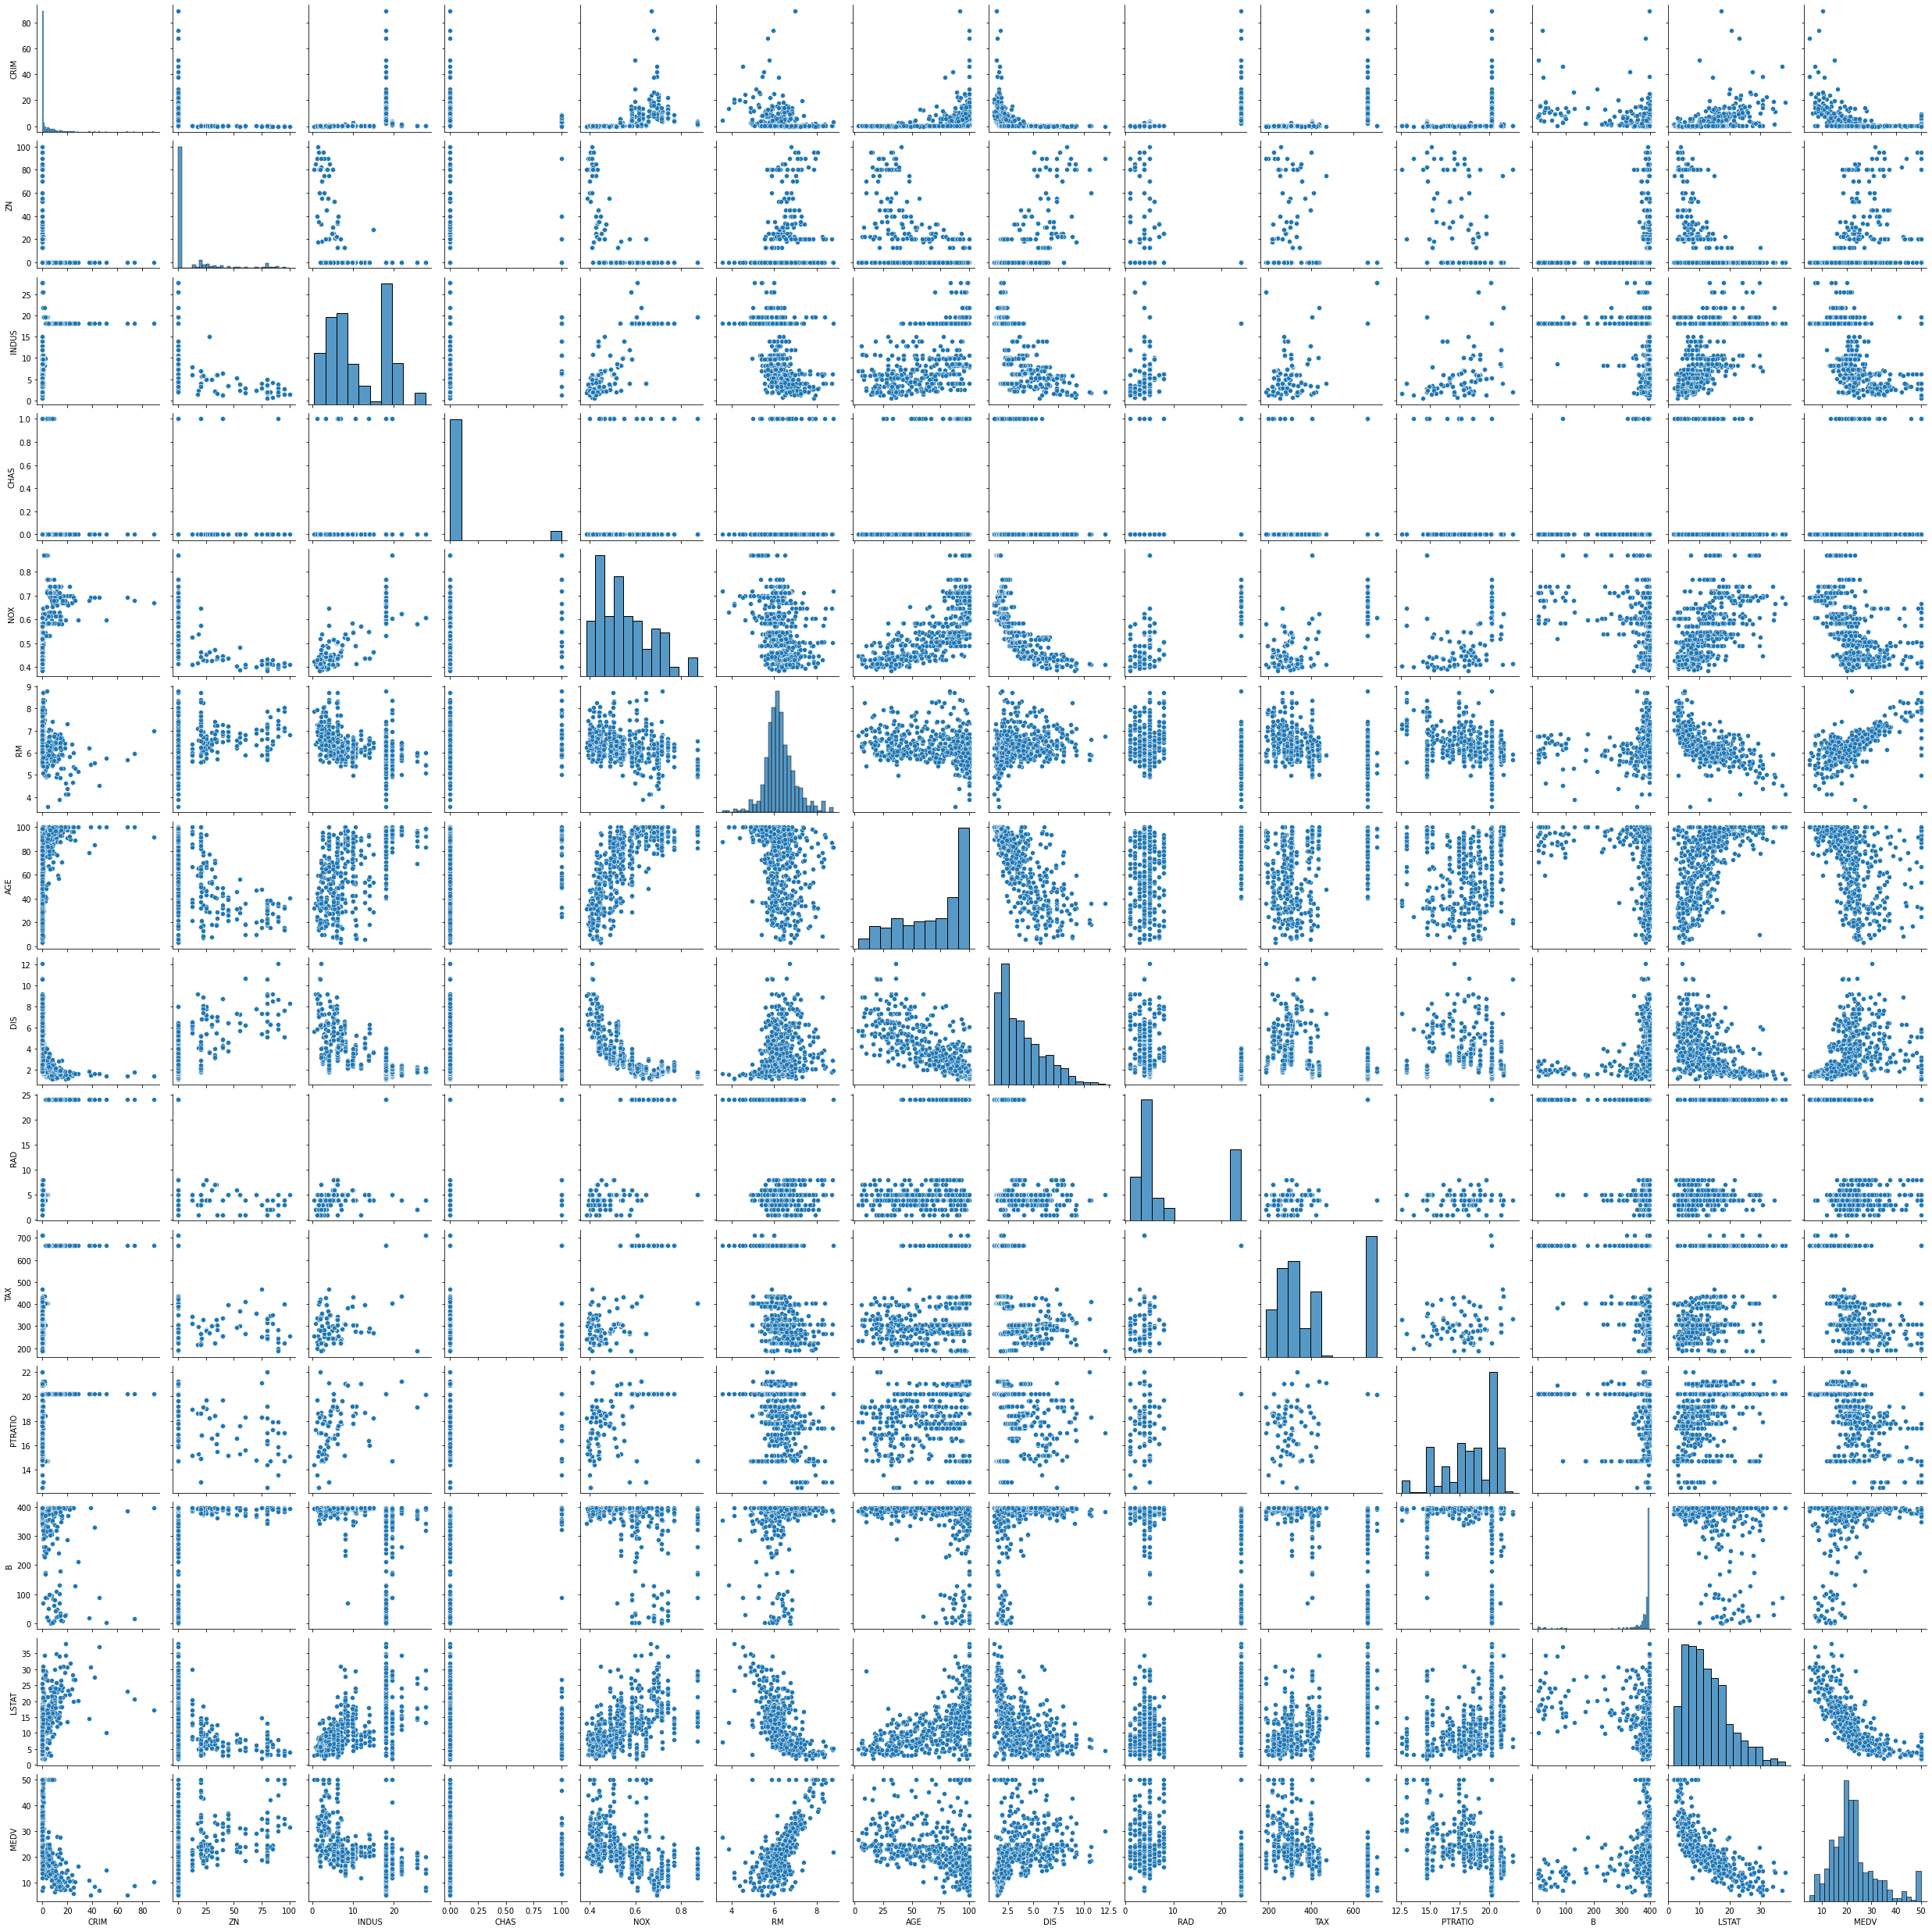

In [85]:
sns.pairplot(boston)

In [72]:
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [73]:
features

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [76]:
corr_mat=boston[features].corr().round(2)
corr_mat

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
CRIM,1.00,-0.20,0.41,-0.06,0.42,-0.22,0.35,-0.38,0.63,0.58,0.29,-0.39,0.46
ZN,-0.20,1.00,-0.53,-0.04,-0.52,0.31,-0.57,0.66,-0.31,-0.31,-0.39,0.18,-0.41
INDUS,0.41,-0.53,1.00,0.06,0.76,-0.39,0.64,-0.71,0.60,0.72,0.38,-0.36,0.60
CHAS,-0.06,-0.04,0.06,1.00,0.09,0.09,0.09,-0.10,-0.01,-0.04,-0.12,0.05,-0.05
NOX,0.42,-0.52,0.76,0.09,1.00,-0.30,0.73,-0.77,0.61,0.67,0.19,-0.38,0.59
RM,-0.22,0.31,-0.39,0.09,-0.30,1.00,-0.24,0.21,-0.21,-0.29,-0.36,0.13,-0.61
AGE,0.35,-0.57,0.64,0.09,0.73,-0.24,1.00,-0.75,0.46,0.51,0.26,-0.27,0.60
DIS,-0.38,0.66,-0.71,-0.10,-0.77,0.21,-0.75,1.00,-0.49,-0.53,-0.23,0.29,-0.50
RAD,0.63,-0.31,0.60,-0.01,0.61,-0.21,0.46,-0.49,1.00,0.91,0.46,-0.44,0.49
TAX,0.58,-0.31,0.72,-0.04,0.67,-0.29,0.51,-0.53,0.91,1.00,0.46,-0.44,0.54


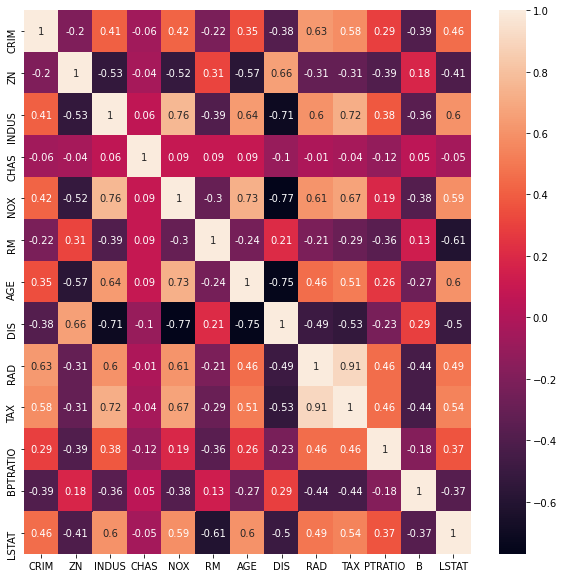

In [83]:
plt.subplots(figsize=(10,10))
sns.heatmap(data=corr_mat,annot=True)
plt.show()

C:\ProgramData\Anaconda3\envs\tens_2\lib\site-packages\seaborn\regression.py:580: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


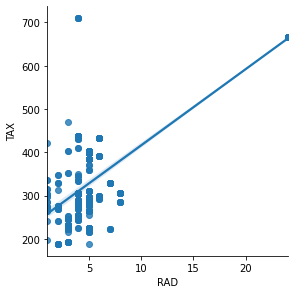

In [87]:
sns.lmplot(x='RAD',y='TAX',data=boston,order=1,size=4)

C:\ProgramData\Anaconda3\envs\tens_2\lib\site-packages\seaborn\regression.py:580: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


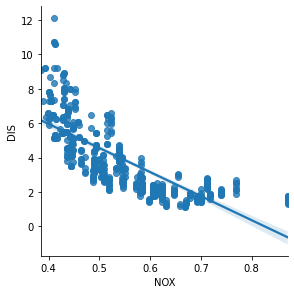

In [88]:
sns.lmplot(x='NOX',y='DIS',data=boston,order=1,size=4)

### Normality with Histogram and Q-Q Plot

Histograms

C:\ProgramData\Anaconda3\envs\tens_2\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='x', ylabel='Density'>

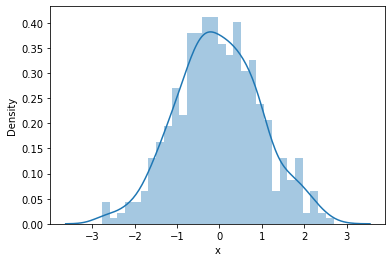

In [90]:
sns.distplot(demo_df['x'],bins=30)

C:\ProgramData\Anaconda3\envs\tens_2\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='RM', ylabel='Density'>

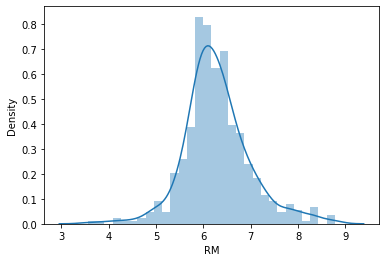

In [91]:
sns.distplot(boston['RM'],bins=30)

C:\ProgramData\Anaconda3\envs\tens_2\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='LSTAT', ylabel='Density'>

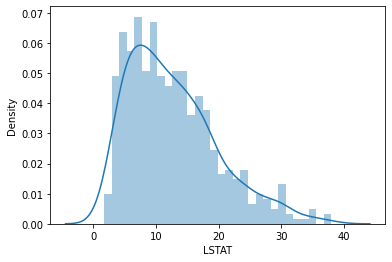

In [92]:
sns.distplot(boston['LSTAT'],bins=30)

C:\ProgramData\Anaconda3\envs\tens_2\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='LSTAT', ylabel='Density'>

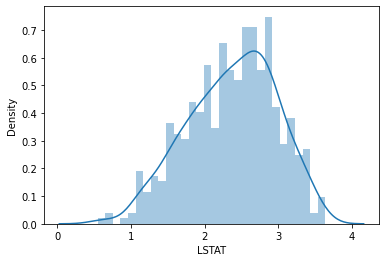

In [93]:
sns.distplot(np.log(boston['LSTAT']),bins=30)

Q-Q Plot

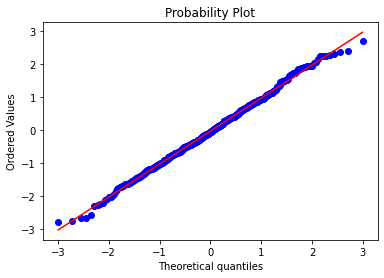

In [94]:
stats.probplot(demo_df['x'],dist='norm',plot=plt)
plt.show()

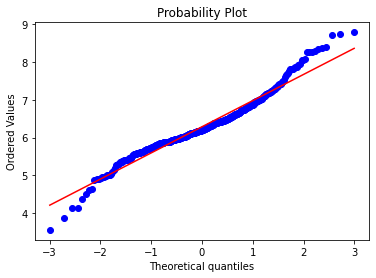

In [95]:
stats.probplot(boston['RM'],dist='norm',plot=plt)
plt.show()

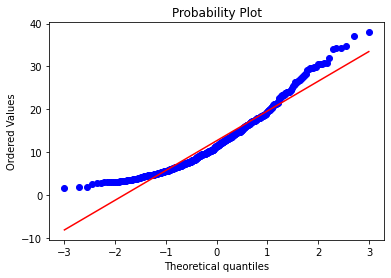

In [96]:
stats.probplot(boston['LSTAT'],dist='norm',plot=plt)
plt.show()

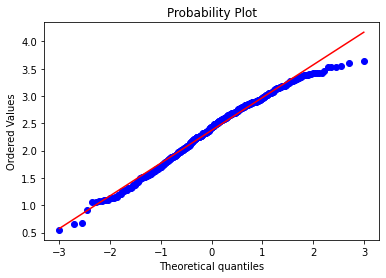

In [99]:
stats.probplot(np.log(boston['LSTAT']),dist='norm',plot=plt)
plt.show()

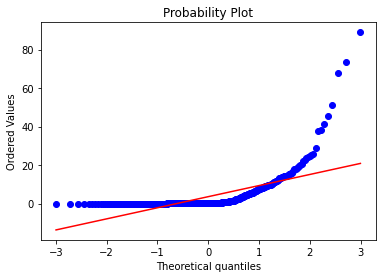

In [97]:
stats.probplot(boston['CRIM'],dist='norm',plot=plt)
plt.show()

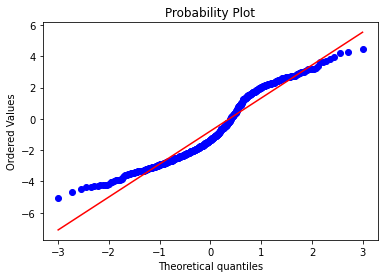

In [102]:
stats.probplot(np.log(boston['CRIM']),dist='norm',plot=plt)
plt.show()

### Homoscedasticity

In [103]:
x_train,x_test,y_train,y_test=train_test_split(boston[['RM','LSTAT','CRIM']],boston['MEDV'],test_size=0.2)

In [105]:
x_train.shape, y_train.shape, x_test.shape

((404, 3), (404,), (102, 3))

In [106]:
scaler=StandardScaler()
scaler.fit(x_train)

StandardScaler()

In [112]:
reg=LinearRegression()
reg.fit(scaler.transform(x_train),y_train)
pred=reg.predict(scaler.transform(x_train))
print('linear regression MSE of train dataset:',mean_squared_error(y_train,pred))

pred=reg.predict(scaler.transform(x_test))
print('linear regression MSE of test dataset:',mean_squared_error(y_test,pred))

linear regression MSE of train dataset: 30.437958204698642
linear regression MSE of test dataset: 28.12800785486218


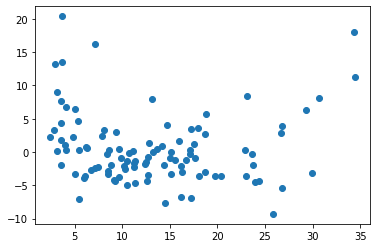

In [113]:
error=y_test-pred
plt.scatter(x=x_test['LSTAT'],y=error)

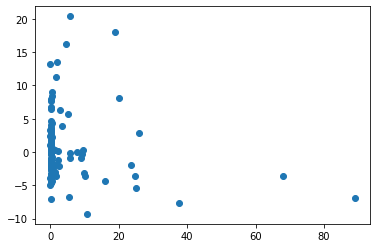

In [115]:
error=y_test-pred
plt.scatter(x=x_test['CRIM'],y=error)

C:\ProgramData\Anaconda3\envs\tens_2\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='MEDV', ylabel='Density'>

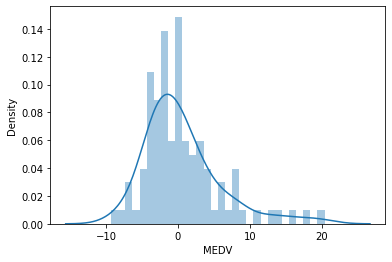

In [116]:
sns.distplot(error,bins=30)

log 씌워서 다시 해봄

In [117]:
x_train,x_test,y_train,y_test=train_test_split(np.log(boston[['RM','LSTAT','CRIM']]),boston['MEDV'],test_size=0.2)

In [118]:
x_train.shape, y_train.shape, x_test.shape

((404, 3), (404,), (102, 3))

In [119]:
scaler=StandardScaler()
scaler.fit(x_train)

StandardScaler()

In [120]:
reg=LinearRegression()
reg.fit(scaler.transform(x_train),y_train)
pred=reg.predict(scaler.transform(x_train))
print('linear regression MSE of train dataset:',mean_squared_error(y_train,pred))

pred=reg.predict(scaler.transform(x_test))
print('linear regression MSE of test dataset:',mean_squared_error(y_test,pred))

linear regression MSE of train dataset: 25.634511732751285
linear regression MSE of test dataset: 27.136966469693878


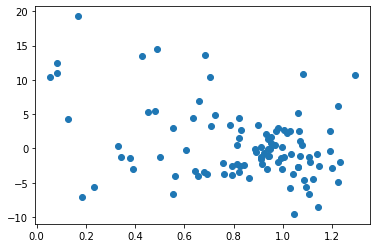

In [122]:
error=y_test-pred
plt.scatter(x=np.log(x_test['LSTAT']),y=error)

C:\ProgramData\Anaconda3\envs\tens_2\lib\site-packages\pandas\core\series.py:726: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


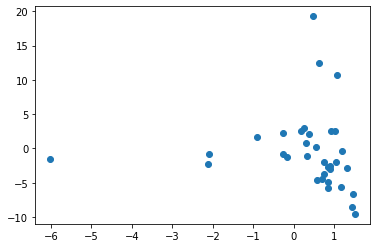

In [123]:
error=y_test-pred
plt.scatter(x=np.log(x_test['CRIM']),y=error)

# 5. Detect Outliers

In [124]:
boston_dataset=load_boston()

In [127]:
def get_dist(df,col):
    plt.figure(figsize=(18,6))
    plt.subplot(1,3,1)
    plt.hist(df[col],bins=30)
    plt.title('Hist')
    
    plt.subplot(1,3,2)
    stats.probplot(df[col],dist='norm',plot=plt)
    plt.ylabel('quantiles')
    
    plt.subplot(1,3,3)
    sns.boxplot(y=df[col])
    plt.title('Boxplot')
    
    plt.show()

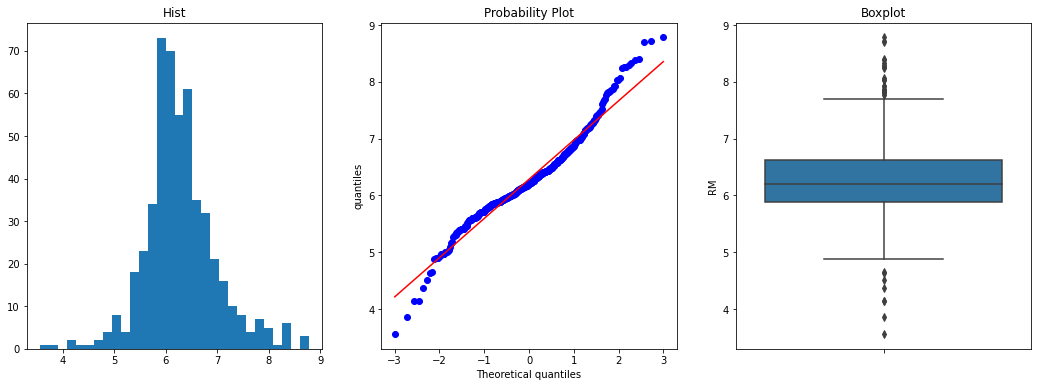

In [128]:
get_dist(boston,'RM')

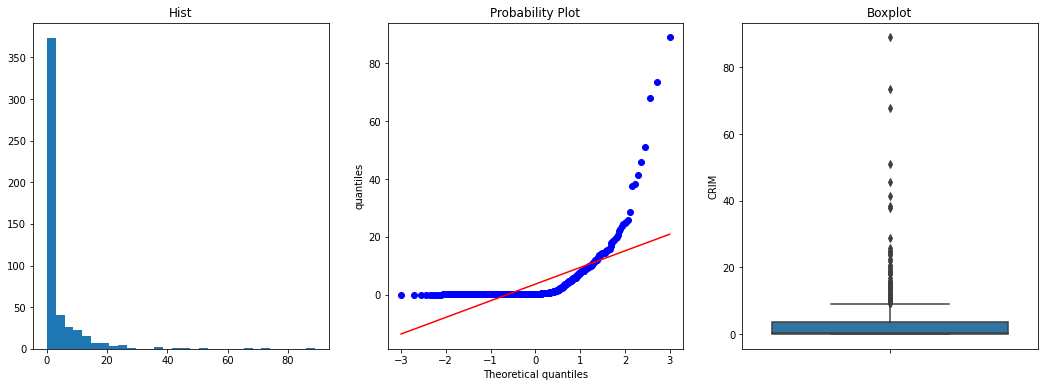

In [131]:
get_dist(boston,'CRIM')

### Outliers detection

In [140]:
def find_normal_outliers(df,col):
    upper_limit=df[col].mean()+3*df[col].std()
    lower_limit=df[col].mean()-3*df[col].std()
    return lower_limit,upper_limit

In [139]:
find_normal_outliers(boston,'RM')

(4.176782957105809, 8.392485817597748)

In [155]:
def find_skewed_outliers(df,col,distance):
    IQR=df[col].quantile(0.75)-df[col].quantile(0.25)
    
    upper_limit=df[col].quantile(0.75)+ distance*IQR
    lower_limit=df[col].quantile(0.25)- distance*IQR
    return lower_limit,upper_limit

In [156]:
find_skewed_outliers(boston,'LSTAT',1.5)

(-8.057500000000005, 31.962500000000006)

In [157]:
find_skewed_outliers(boston,'CRIM',3)

(-10.7030675, 14.462195000000001)